# Rauschen

## Klassifikation von Signalen

Ganz allgemein lassen sich Signale in unterschiedliche Kategorien einteilen. So unterscheiden wir beispielsweise Leistungs- und Energiesignale. Für Energiesignale $x(t)$ gilt

\begin{equation}
    \int_{- \infty}^{\infty} |x(t)|^2 dt < \infty \; ,
\end{equation}

für Leistungssignale entsprechend

\begin{equation}
    \lim_{T \to \infty} \frac{1}{2T} \int_{-T}^T |x(t)|^2 dt < \infty \; .
\end{equation}

Leistungssignale haben also eine endliche Leistung, Energiesignale eine endliche Energie. Beispielsweise sind alle periodischen Signale, also z.B. Sinus und Kosinus, keine Energiesignale, aufgrund ihrer endlichen Leistung aber Leistungssignale. Gleiches gilt für stationäre stochastische Signale.

Ferner unterscheiden wir analoge und digitale Signale sowie Mischformen.

* Ein analoges Signal ist zeit- und wertekontinuierlich.
* Tastet man ein analoges Signal ab, ist es zeitdiskret, aber noch wertekontinuierlich.
* Quantisiert man die Amplituden eines analogen Signals, ist es wertediskret aber noch zeitkontinuierlich.
* Ein digitales Signal ist sowohl zeit- als auch wertediskret.

Stochastische Signale wie beispielsweise zufällige Störeinflüsse werden in der Nachrichtentechnik häufig als Rauschen bezeichnet. Anders als deterministische Signale lassen sich stochastische Signale nicht durch analytische Funktionen beschreiben, sondern lediglich durch ihre statistischen Kenngrößen. Hierzu zählen 

* die Wahrscheinlichkeitsdichtefunktion (Wahrscheinlichkeiten bei diskreten Signalen)
* daraus abgeleitet Mittelwert, Varianz und weitere Momente
* Autokorrelationsfunktion und Leistungsdichtespektrum.

Im Folgenden gehen wir von stationären Zufallsprozessen aus, die ihre statistischen Eigenschaften nicht über der Zeit ändern. Dazu betrachten wir den Spezialfall von additivem, weißem gaußverteiltem Rauschen (AWGN: Additive White Gaussian Noise). Hier wird das Informationssignal $x(t)$ durch Rauschen $n(t)$ gestört und wir erhalten das Empfangssignal 

\begin{equation}
    y(t) = x(t) + n(t)
\end{equation}

Eine wichtige Kenngröße ist das Signal-zu-Rauschverhältnis $\gamma$. Für mittelwertfreie Signale $x(t)$ und $n(t)$ lautet es

\begin{equation}
    \gamma = \frac{\sigma_{\cal X}^2}{\sigma_{\cal N}^2}
\end{equation}

und wird normalerweise als Signal-Rausch-Abstand $10 \log_{10}(\gamma)$ in dB angegeben.

Zunächst diskutieren wir die Gaußverteilung der Amplituden von $n(t)$, anschließend die Färbung des Rauschens. Beides sind voneinander unabhängige Eigenschaften.

## Charakterisierung der Amplitudenverteilung

In der Regel setzt sich das Rauschen aus vielen unterschiedlichen Quellen zusammen. Sind diese voneinander statistisch unabhängig, ergibt die Überlagerung nach dem zentralen Grenzwertsatz der Stochastik asymptotisch eine Gaußverteilung. Für statistisch unabhängige Rauschkomponenten $n_i(t)$ mit den Mittelwerten $\mu_{{\cal N},i}$ und den Varianzen $\sigma_{{\cal N},i}^2$ ist die Summe

\begin{equation}
     n(t) = \sum_{i=1}^L n_i(t)
\end{equation}

für $L \to \infty$ gaußverteilt mit Mittelwert und Varianz

\begin{align}
    \mu_{\cal N} &= \sum_{i=1}^L \mu_{{\cal N},i} \\
    \sigma_{\cal N}^2 &= \sum_{i=1}^L \sigma_{{\cal N},i}^2  \; .
\end{align}


Für reellwertiges Rauschen lautet die Gaußverteilung 

\begin{equation}
    p_{\cal N}(\xi) = \frac{1}{\sqrt{2 \pi \sigma_{\cal N}^2}} 
                      \cdot e^{- \frac{(\xi-\mu_{\cal N})^2}{2 \sigma_{\cal N}^2}} \; .
\end{equation}

Für komplexes Rauschen $n(t)=n'(t)+jn''(t)$ wird in der Regel angenommen, dass Real- und Imaginärteil statistisch unabhängig voneinander sind und die Leistung des Rauschen $\sigma_{\cal N}^2$ sich gleichmäßig auf beide Komponenten aufteilt. Es gilt dann $\sigma_{{\cal N}'}^2=\sigma_{{\cal N}''}^2=\frac{\sigma_{\cal N}^2}{2}$. Für diesen Fall lautet die komplexe Gaußverteilung 

\begin{align}
    p_{\cal N}(\xi) 
    &= p_{{\cal N}'}(\xi') \cdot p_{{\cal N}''}(\xi'') \\
    &= \frac{1}{\sqrt{2 \pi \sigma_{{\cal N}'}^2}} 
       \cdot e^{- \frac{(\xi'-\mu_{{\cal N}'})^2}{2 \sigma_{{\cal N}'}^2}} 
       \cdot \frac{1}{\sqrt{2 \pi \sigma_{{\cal N}''}^2}} 
       \cdot e^{- \frac{(\xi''-\mu_{{\cal N}''})^2}{2 \sigma_{{\cal N}''}^2}}  \\
    &= \frac{1}{\pi \sigma_{\cal N}^2} 
       \cdot e^{- \frac{(\xi'-\mu_{{\cal N}'})^2 + (\xi''-\mu_{{\cal N}''})^2}
                       {\sigma_{\cal N}^2}}  \\
    &= \frac{1}{\pi \sigma_{\cal N}^2} 
       \cdot e^{- \frac{|\xi-\mu_{\cal N}|^2}{\sigma_{\cal N}^2}} \; .
\end{align}

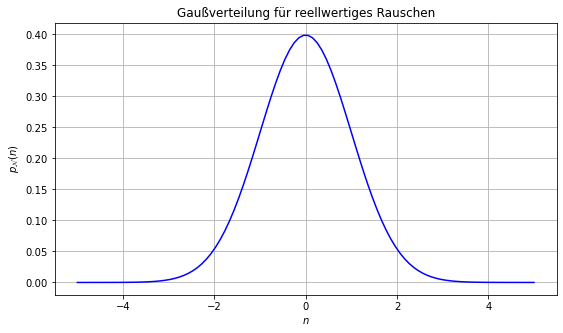

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# real gaussian distribution
# number of samples
N = 100
# variance
sigma2_N = 1.0
# mean
mu_N_real = 0.0
# amplitude range
n_real = 5.0 * np.sqrt(sigma2_N) * np.linspace(-1,1,N) + mu_N_real
pdf_N_real = np.exp(-(n_real-mu_N_real)**2/2/sigma2_N) / np.sqrt(2*np.pi*sigma2_N)

fig_real = plt.figure(figsize=(9,5))

ax1 = fig_real.add_subplot(111)
ax1.plot(n_real, pdf_N_real, 'b-')
plt.xlabel('$n$')
plt.ylabel('$p_{\cal N}(n)$')
plt.title('Gaußverteilung für reellwertiges Rauschen')
plt.grid(True)

plt.show()

Das obere Bild zeigt eine reelle Gaußverteilung mit Mittelwert $\mu_{\cal N}=0$ und Varianz $\sigma_{\cal N}^2=1$. Im unteren Bild ist die Wahrscheinlichkeitsdichtefunktion für komplexes gaußverteiltes Rauschen mit Mittelwert $\mu_{\cal N} = 1+j0.5$ und Varianz $\sigma_{\cal N}^2=1$ dargestellt. Dabei ist zu beachten, dass sich die Varianz zu gleichen Teilen auf Real- und Imagintärteil aufteilt, beide besitzen jeweils die Varianz $\sigma_{{\cal N}'}^2=\sigma_{{\cal N}''}^2=0.5$. Die zugehörigen marginalen Gaußverteilungen, welche durch Marginalisierung der jeweils anderen Komponente gewonnen werden, sind ebenfalls als 2D-Kurven dargestellt.

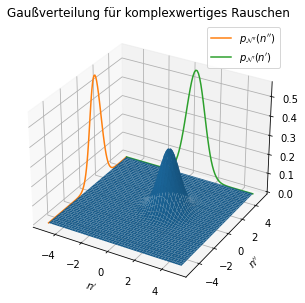

In [2]:
from mpl_toolkits.mplot3d import Axes3D

# complex gaussian distribution
# mean
mu_N_cmplx = 1.0 + 1j*0.5
# amplitude range
dn = n_real[1] - n_real[0]
n_re, n_im = np.meshgrid(n_real,n_real)
n_cmplx = n_re + 1j*n_im
pdf_N_cmplx = np.exp(-np.abs(n_cmplx-mu_N_cmplx)**2/sigma2_N) / (np.pi*sigma2_N)
# marginal densities
pdf_Ni_cmplx = np.sum(pdf_N_cmplx,axis=0) * dn   # imaginary part
pdf_Nr_cmplx = np.sum(pdf_N_cmplx,axis=1) * dn   # real part

fig_cmplx = plt.figure(figsize=(9,5))
ax2 = fig_cmplx.add_subplot(111, projection='3d')
ax2.plot_surface(np.real(n_cmplx),np.imag(n_cmplx), pdf_N_cmplx)
ax2.plot(-np.ones(len(n_real))*5,n_real, pdf_Ni_cmplx,label='$p_{{\cal N}^{\prime\prime}}(n^{\prime\prime})$')
ax2.plot(n_real,np.ones(len(n_real))*5, pdf_Nr_cmplx,label='$p_{{\cal N}^{\prime}}(n^{\prime})$')
plt.xlabel('$n^{\prime}$')
plt.ylabel('$n^{\prime\prime}$')
plt.title('Gaußverteilung für komplexwertiges Rauschen')
plt.grid(True)
plt.legend()
plt.show()

## Charakterisierung des zeitlichen Verhaltens

Die Färbung des Rauschens gibt Auskunft über das zeitliche Verhalten des Rauschens. Weißes Rauschen enthält ähnlich wie weißes Licht alle Spektralanteile im betracheten Frequenzbereich mit der gleichen Intensität, farbiges Rauschen hat dementsprechend unterschiedliche Intensitäten in Abhängigkeit der Frequenz. Die mittlere Verteilung der Leistung über der Frequenz wird durch das Leistungsdichtespektrum $S_{\cal NN}(j \omega)$ beschrieben, welche die Einheit [Watt/Hz] hat. Die Gesamtleistung berechnet sich aus dem Integral der Leistungsdichte über der Frequenz. Für einen begrenzten Frequenzbereich $[-B/2,+B/2]$ gilt

\begin{align}
    N = \frac{1}{2 \pi} \cdot \int_{-\pi B}^{\pi B} S_{\cal NN}(j \omega) \ d\omega \; .
\end{align}

Für weißes Rauschen ist die spektrale Leistungsdichte eine Konstante und wird in der Nachrichtentechnik häufig mit $N_0/2$ im Übertragungsband definiert. Im äquivalenten Basisband beträgt sie dann $N_0$, wobei sich die Leistung gleichmäßig auf Real- und Imaginärteil aufteilt. Da sich bei einer Zweiseitenbandmodulation die Bandbreite verdoppelt, ergibt sich im Übertragungs- wie auch im äquivalenten Basisband die gleiche Rauschleistung 

\begin{align}
    N &= \frac{1}{2 \pi} \cdot \int_{-\pi B}^{\pi B} N_0 \ d\omega 
       = \frac{1}{2 \pi} \cdot \int_{-\omega_0 - \pi B}^{-\omega_0 + \pi B} \frac{N_0}{2}
       \ d\omega 
       + \frac{1}{2 \pi} \cdot \int_{\omega_0 - \pi B}^{\omega_0+\pi B} \frac{N_0}{2} \ d\omega 
      = B N_0 \; .
\end{align}

Das zeitliche Verhalten des Rauschens ist über das berühmte Theorem von Wiener und Khintchine mit dem Leistungsdichtespektrum verbunden. Genauer gesagt stellt die spektrale Leistungsdichte die Fourier-Transformierte der Autokorrelationsfunktion dar.

\begin{equation}
    S_{\cal NN}(j \omega) = \int_{- \infty}^{\infty} r_{\cal NN}(\tau) \ d\tau
\end{equation}

Dabei stellt $r_{\cal NN}(\tau) = \mathrm{E}\{ n^*(t) n(t-\tau) \}$ die Autokorrelationsfunktion des Rauschens dar. Durch lineare Filterung kann weißes Rauschen gefärbt werden. 

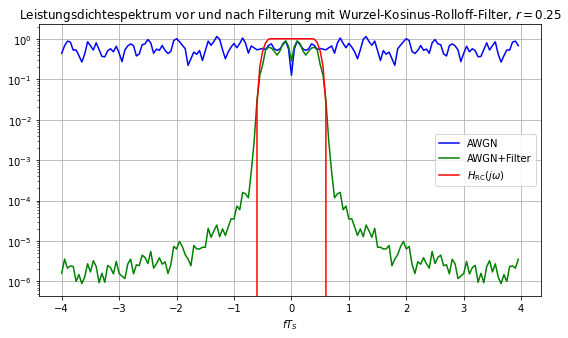

In [4]:
from modulation import rcosfilter, rrcosfilter
from scipy import signal

N = 1000
# averaging for power density spectrum
Npsd = 50

# roll-off factor of Root-Raised-Cosine filter
r = 0.25
# symbol duration in seconds
Ts = 1e-6
# oversampling factor
w = 8
# sampling rate in Hz
fa = w / Ts
# length of filter impulse response in samples
N_rc = 8*w
time,g_rrc = rrcosfilter(N_rc,r,Ts,fa)
time = time / Ts

awgn = np.random.normal(0,sigma2_N,N)

# filter
awgn_rrc = np.convolve(awgn,g_rrc)

# estimation of power spectral density with Welch method
f, psd_awgn = signal.welch(awgn, fs=fa, nperseg=N*w/Npsd, return_onesided=False, scaling='spectrum')
f, psd_awgn_rrc = signal.welch(awgn_rrc, fs=fa, nperseg=N*w/Npsd, return_onesided=False, scaling='spectrum',axis=0)
f = np.fft.fftshift(f)
psd_awgn = np.fft.fftshift(psd_awgn) * N_rc
psd_awgn_rrc = np.fft.fftshift(psd_awgn_rrc)

# analytical solution of power spectral density equals squared magnitude of transfer function of root-raised-cosine transmit filter
# squared magnitude of root-raised-cosine characteristic equals raised-cosine characteristic
# solution normalized to maximum value of 1 (divided by T_s sigma_D^2)
G_RC = 0.5 * (1 + np.cos(np.pi/(2*r)*(np.abs(f)*2*Ts-(1-r))))
ptr = np.argwhere(np.abs(f)*2*Ts<1-r)
G_RC[ptr.flatten()] = 1.0
ptr = np.argwhere(np.abs(f)*2*Ts>1+r)
G_RC[ptr.flatten()] = 0.0

fig = plt.figure(figsize=(9,5))
ax3 = fig.add_subplot(111)
ax3.semilogy(f*Ts, psd_awgn, 'b-', label='AWGN')
ax3.semilogy(f*Ts, psd_awgn_rrc, 'g-', label='AWGN+Filter')
ax3.semilogy(f*Ts, G_RC,'r-',label='$H_{\mathrm{RC}}(j \omega)$')
plt.xlabel('$f T_S$')
plt.title('Leistungsdichtespektrum vor und nach Filterung mit Wurzel-Kosinus-Rolloff-Filter, $r=0.25$')
plt.grid(True)
plt.legend()

plt.show()

Im obigen Bild ist deutlich zu erkennen, dass das ursprünglich weiße Rauschen durch die Filterung gefärbt wurde. Sein Leistungsdichtespektrum entspricht dem Betragsquadrat der Übertragungsfunktion des Filters, die Filterung mit einem Wurzel-Kosinus-Rolloff-Filter hat also eine Kosinus-Rolloff-Charakteristik des Leistungsdichtespektrums zur Folge.